In [122]:
import scvelo as scv
import pandas as pd
import csv
import umap
import igraph
import louvain
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix
import os
import anndata
import scanpy as sc
import session_info
import h5py

In [88]:
import numpy as np
numpy.version.version

'1.19.0'

In [123]:
session_info.show()

In [3]:
#set figure parameters 
scv.set_figure_params()

In [233]:
#Create AnnData object from seurat-data

#load matrix 
X = io.mmread("/Users/franziskahildebrandt/t.gondi_dc/data/adata_create/counts.mtx")
# create anndata object
adata = anndata.AnnData(
    X=X.transpose().tocsr())

# load cell metadata:
cell_meta = pd.read_csv("/Users/franziskahildebrandt/t.gondi_dc/data/adata_create/metadata.csv")

# load gene names:
with open("/Users/franziskahildebrandt/t.gondi_dc/data/adata_create/gene_names.csv", 'r') as f:
    gene_names = f.read().splitlines()
    
# set anndata observations and index obs by barcodes, var by gene names
adata.obs = cell_meta
adata.obs.index = adata.obs['barcode']
adata.var.index = gene_names

# load dimensional reduction:
pca = pd.read_csv("/Users/franziskahildebrandt/t.gondi_dc/data/adata_create/pca.csv")
pca.index = adata.obs.index

# set pca and umap
adata.obsm['X_pca'] = pca.to_numpy()
adata.obsm['X_umap'] = np.vstack((adata.obs['UMAP_1'].to_numpy(), adata.obs['UMAP_2'].to_numpy())).T

# plot a UMAP colored by sampleID to test:
#sc.pl.umap(adata, color=['cell_class'], frameon=False, save=True)
##show a specific column based on index: 
#adata.obs.iloc[:, 14] -> column 14

##write data 
adata.write_h5ad("/Users/franziskahildebrandt/t.gondi_dc/data/anndata_dc_mus.h5ad")
#adata.obs

#adata

... storing 'cell_class' as categorical


RuntimeError: Unable to create link (name already exists)

Above error raised while writing key 'barcode' of <class 'h5py._hl.group.Group'> from /.

Above error raised while writing key 'obs' of <class 'h5py._hl.files.File'> from /.

In [234]:
#adata = scv.read("/Users/franziskahildebrandt/t.gondi_dc/data/anndata_dc_mus.h5ad")
adata

AnnData object with n_obs × n_vars = 518 × 25309
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nUMI', 'mouse_nUMI', 'toxo_nUMI', 'nGene', 'mouse_nGene', 'toxo_nGene', 'cell_ID', 'mouse_nUMI_p', 'toxo_nUMI_p', 'mouse_nGene_p', 'toxo_nGene_p', 'cell_class', 'percent.mt', 'percent.mature', 'percent.immature', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'barcode', 'UMAP_1', 'UMAP_2'
    obsm: 'X_pca', 'X_umap'

In [191]:
ldata1 = scv.read("/Users/franziskahildebrandt/t.gondi_dc/data/velocyto/OUTPUT/131/onefilepercell_A10_R1_and_others_KC4RZ.loom", cache=True)
ldata1.var
ldata1.var_names_make_unique

#Do the same for the second plate

ldata2 = scv.read("/Users/franziskahildebrandt/t.gondi_dc/data/velocyto/OUTPUT/132/onefilepercell_A10_R1_and_others_SL8F7.loom", cache=True)
ldata2.var
ldata2.var_names_make_unique


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


<bound method AnnData.var_names_make_unique of AnnData object with n_obs × n_vars = 380 × 63736
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spanning', 'spliced', 'unspliced'>

In [58]:
ldata2.obs.to_csv("/Users/franziskahildebrandt/t.gondi_dc/data/velocyto/obs_132.tsv", sep = "\t")
                  

In [44]:
ldata1.var

,Accession,Chromosome,End,Start,Strand
Xkr4,ENSMUSG00000051951,1,3741721,3276124,-
Gm37180,ENSMUSG00000103377,1,3438772,3435954,-
Gm37363,ENSMUSG00000104017,1,3448011,3445779,-
Gm37686,ENSMUSG00000103025,1,3537508,3535200,-
Gm37329,ENSMUSG00000103201,1,3584730,3582674,-
...,...,...,...,...,...
Gm29504,ENSMUSG00000100533,Y,90288770,90286493,+
Gm20837,ENSMUSG00000096178,Y,90444532,90412517,+
Mid1-ps1,ENSMUSG00000095134,Y,90774754,90764326,+
Gm47283,ENSMUSG00000096768,Y,90827734,90796007,+


In [45]:
ldata2.var

,Accession,Chromosome,End,Start,Strand
Xkr4,ENSMUSG00000051951,1,3741721,3276124,-
Gm37180,ENSMUSG00000103377,1,3438772,3435954,-
Gm37363,ENSMUSG00000104017,1,3448011,3445779,-
Gm37686,ENSMUSG00000103025,1,3537508,3535200,-
Gm37329,ENSMUSG00000103201,1,3584730,3582674,-
...,...,...,...,...,...
Gm29504,ENSMUSG00000100533,Y,90288770,90286493,+
Gm20837,ENSMUSG00000096178,Y,90444532,90412517,+
Mid1-ps1,ENSMUSG00000095134,Y,90774754,90764326,+
Gm47283,ENSMUSG00000096768,Y,90827734,90796007,+


In [62]:
ldata2.obs

#"132_G3" "132_M1" "132_M2" "132_O6" are not present in loom file - need to be removed from the cellcount file to continue analysis

""
onefilepercell_A10_R1_and_others_SL8F7:A10_R1.fastqAligned.sortedByCoord.out.bam
onefilepercell_A10_R1_and_others_SL8F7:A11_R1.fastqAligned.sortedByCoord.out.bam
onefilepercell_A10_R1_and_others_SL8F7:A12_R1.fastqAligned.sortedByCoord.out.bam
onefilepercell_A10_R1_and_others_SL8F7:A13_R1.fastqAligned.sortedByCoord.out.bam
onefilepercell_A10_R1_and_others_SL8F7:A14_R1.fastqAligned.sortedByCoord.out.bam
...
onefilepercell_A10_R1_and_others_SL8F7:P5_R1.fastqAligned.sortedByCoord.out.bam
onefilepercell_A10_R1_and_others_SL8F7:P6_R1.fastqAligned.sortedByCoord.out.bam
onefilepercell_A10_R1_and_others_SL8F7:P7_R1.fastqAligned.sortedByCoord.out.bam
onefilepercell_A10_R1_and_others_SL8F7:P8_R1.fastqAligned.sortedByCoord.out.bam


In [192]:
cell_obs_1 = pd.read_csv("/Users/franziskahildebrandt/t.gondi_dc/data/plates/cellnames_131.tsv", sep='\t', index_col= 0)
cell_obs_2 = pd.read_csv("/Users/franziskahildebrandt/t.gondi_dc/data/plates/cellnames_132.tsv", sep='\t', index_col= 0)
cell_obs_2
cell_obs_1

""
barcodes
131_A10
131_A11
131_A12
131_A13
131_A14
...
131_P5
131_P6
131_P7


In [193]:
#Filter observations to only include cells that are also present in the main analysis 
filt_obs_1 = pd.read_csv("/Users/franziskahildebrandt/t.gondi_dc/data/plates/filtered_cells_131.tsv", header = 0, index_col= 0, sep = "\t")
filt_obs_2 = pd.read_csv("/Users/franziskahildebrandt/t.gondi_dc/data/plates/filtered_cells_132.tsv", header = 0,  index_col= 0, sep = "\t")
filt_obs_2


""
barcodes
132_A11
132_A12
132_A13
132_A14
132_A15
...
132_P5
132_P6
132_P7


In [195]:
ldata1.obs = cell_obs_1
ldata1.obs_names
ldata1 = ldata1[ldata1.obs_names.isin(filt_obs_1.index)]

In [196]:
#second plate
ldata2.obs = cell_obs_2
ldata2.obs_names
ldata2 = ldata2[ldata2.obs_names.isin(filt_obs_2.index)]

In [197]:
filt_obs.index

Index(['131_A11', '131_A12', '131_A13', '131_A14', '131_A15', '131_A16',
       '131_A17', '131_A18', '131_A19', '131_A1',
       ...
       '131_P1', '131_P21', '131_P2', '131_P3', '131_P4', '131_P5', '131_P6',
       '131_P7', '131_P8', '131_P9'],
      dtype='object', name='131_A10', length=356)

In [220]:
#make variable names unique 
ldata1.var_names_make_unique()
ldata2.var_names_make_unique()
ldata1.obs.index

Index(['131_A10', '131_A11', '131_A13', '131_A14', '131_A15', '131_A17',
       '131_A18', '131_A1', '131_A22', '131_A3',
       ...
       '131_P16', '131_P17', '131_P18', '131_P21', '131_P2', '131_P3',
       '131_P5', '131_P6', '131_P7', '131_P8'],
      dtype='object', name='barcodes', length=258)

In [219]:
#concatanate the two looms
ldata = np.arange(ldata1,ldata2)
ldata
#adata

KeyboardInterrupt: 

In [212]:
#merge marices into the original adata
adata = scv.utils.merge(adata, ldata)

AttributeError: 'NoneType' object has no attribute 'group'

In [151]:
scv.pp.filter_and_normalize(adata, enforce = True)

Normalized count data: X.
Logarithmized X.


In [13]:
scv.pp.moments(adata)
#numpy v.1.19.0 necessary

computing neighbors
    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [15]:
#get values for dynamical model 
scv.tl.recover_dynamics(adata)

recovering dynamics (using 1/4 cores)



    finished (0:34:53) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [17]:
scv.tl.velocity(adata, mode='dynamical')

computing velocities
    finished (0:00:10) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [18]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/4 cores)



    finished (0:00:05) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [35]:
scv.tl.umap(adata)
scv.tl.louvain(adata)

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


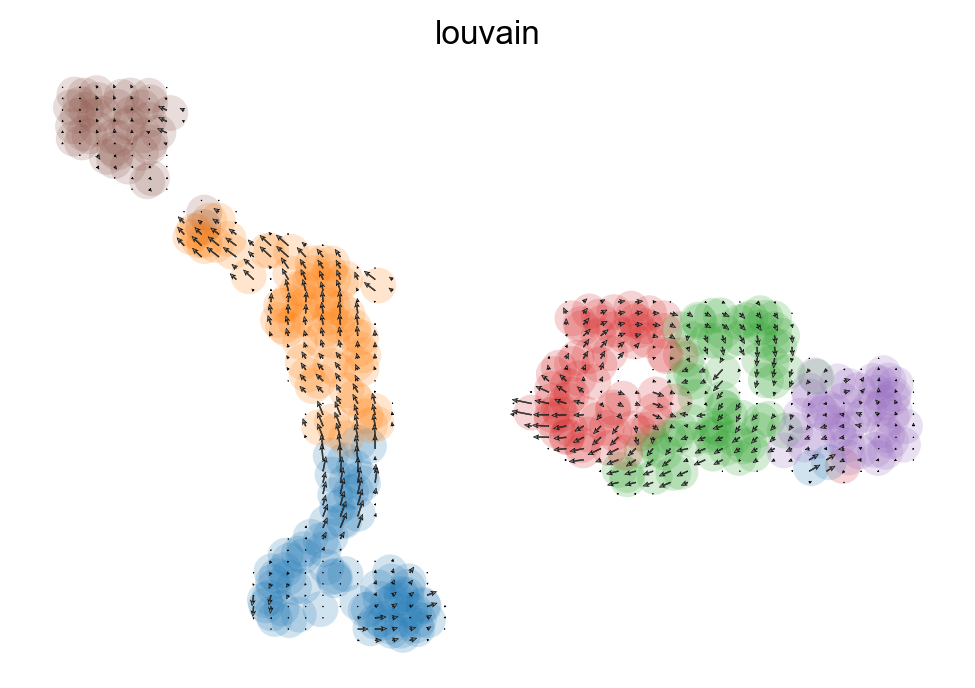

In [36]:
scv.pl.velocity_embedding_grid(adata, basis='umap')

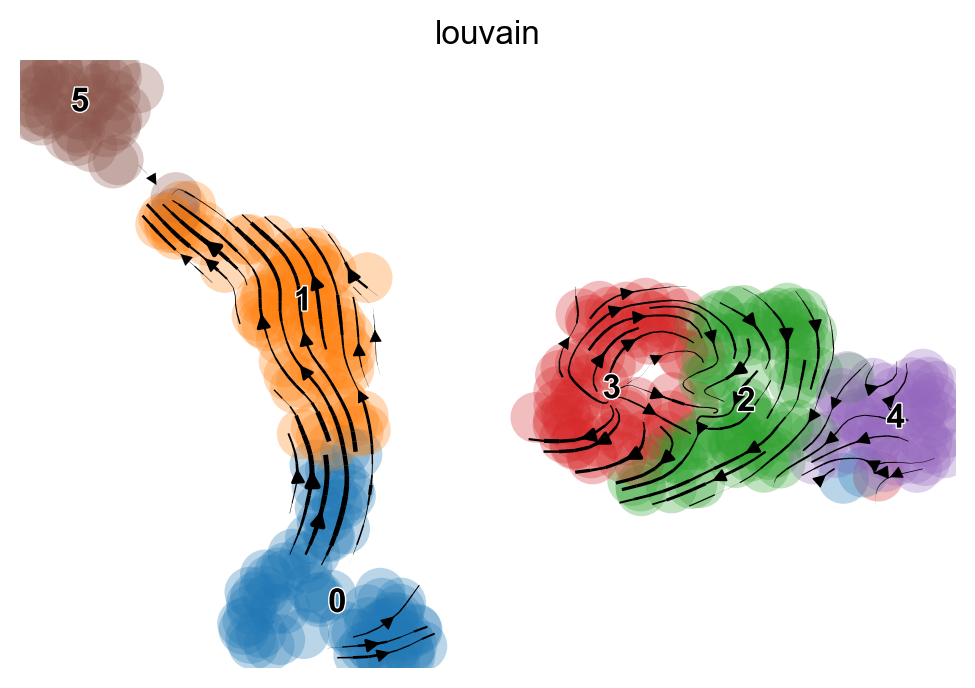

In [37]:
scv.pl.velocity_embedding_stream(adata, basis='umap')

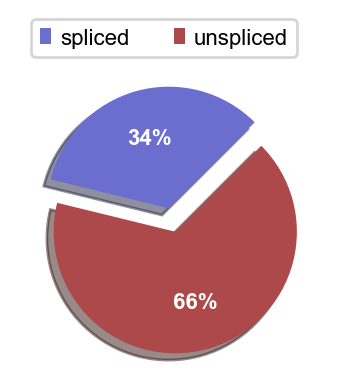

In [14]:
scv.pl.proportions(adata)